In [1]:
import numpy as np
import matplotlib.pyplot as plt
import edl
import plotting

%matplotlib widget

In [2]:
ion_concentration_molar = 1e-1
ion_diameter_m = 2.75e-10
solvent_diameter_m = 2.75e-10
potentials = np.linspace(-0.5, 0.5, 100)

Sweep from -0.01V to -0.50V. Maximum relative residual: 2.82892e-05.
Sweep from -0.01V to 0.50V. Maximum relative residual: 2.82891e-05.


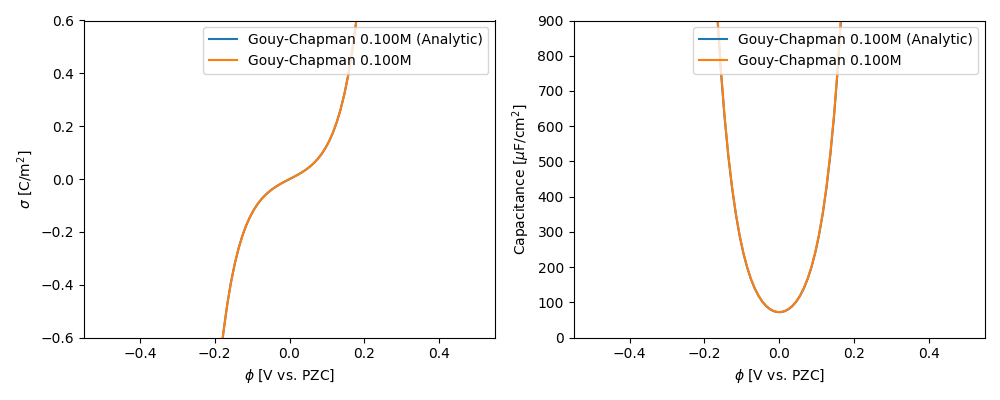

In [3]:
gc = edl.GouyChapman(ion_concentration_molar)
gc_nsol = gc.sweep(potentials, tol=1e-3)
gc_asol = gc.analytical_sweep(potentials)

fig, ax = plotting.plot_potential_sweep([gc_asol, gc_nsol])
ax[1].set_ylim([0, 900])
plt.show()

Sweep from -0.01V to -0.50V. Maximum relative residual: 3.60975e-05.
Sweep from -0.01V to 0.50V. Maximum relative residual: 3.60974e-05.


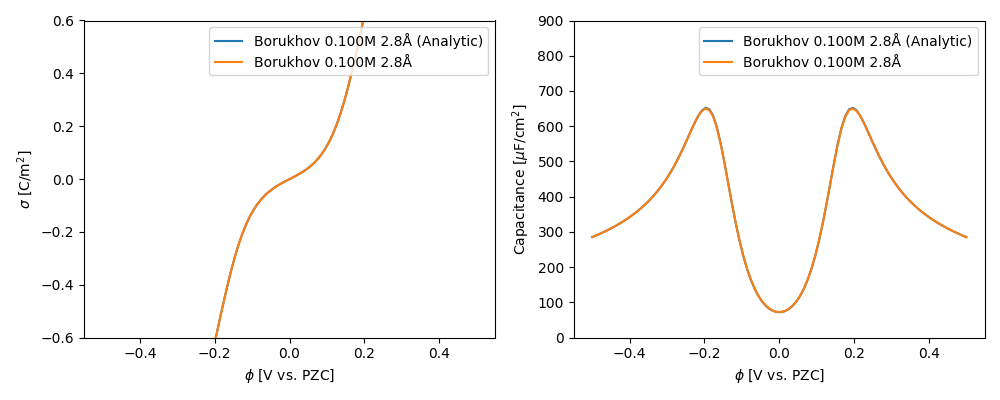

In [4]:
borukhov = edl.Borukhov(ion_concentration_molar, solvent_diameter_m)
borukhov_nsol = borukhov.sweep(potentials, tol=1e-3)
borukhov_asol = borukhov.analytical_sweep(potentials)

fig, ax = plotting.plot_potential_sweep([borukhov_asol, borukhov_nsol])
ax[1].set_ylim([0, 900])
plt.show()

Sweep from -0.01V to -0.50V. Maximum relative residual: 3.18877e-05.
Sweep from -0.01V to 0.50V. Maximum relative residual: 3.42446e-05.
Sweep from -0.01V to -0.50V. Maximum relative residual: 3.16379e-05.
Sweep from -0.01V to 0.50V. Maximum relative residual: 3.16378e-05.


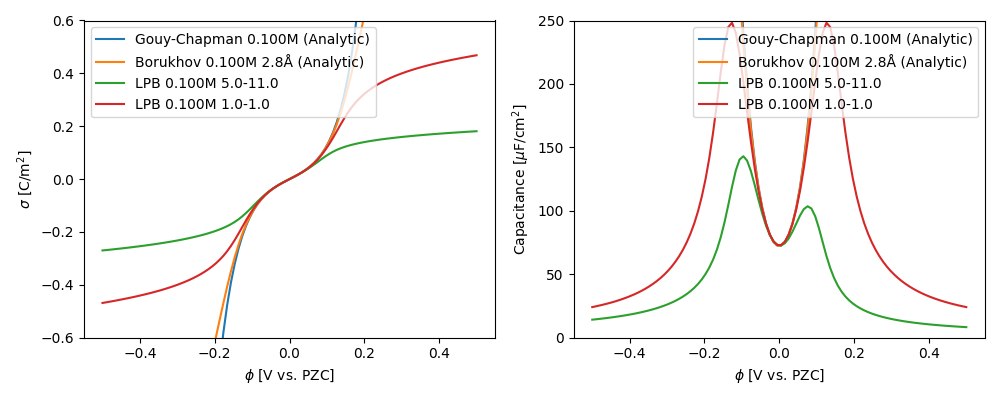

In [5]:
abr = edl.Abrashkin(ion_concentration_molar, 5, 11)
abr_nsol = abr.sweep(potentials)

abr2 = edl.Abrashkin(ion_concentration_molar, 1, 1)
abr2_nsol = abr2.sweep(potentials)

fig, ax = plotting.plot_potential_sweep([gc_asol, borukhov_asol, abr_nsol, abr2_nsol])
ax[1].set_ylim([0, 250])
plt.show()